### Import Library yang dibutuhkan

In [697]:
import numpy as np
import pandas as pd
from scipy import stats
import statistics
import seaborn as sns
import statsmodels.api as sm

### Membaca dataset dan menampilkan lima baris pertama

In [698]:
df = pd.read_csv("dataset/nyc-rolling-sales.csv")
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


### Menampilkan informasi dataset secara umum

In [699]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

### Menampilkan ukuran dataset

In [700]:
df.shape

(84548, 22)

### Menampilkan tipe data kolom dataset

In [701]:
df.dtypes

Unnamed: 0                         int64
BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object

#### Mengubah nilai kolom 'BOROUGH' menjadi string nama borough, dan menampilkan dataframe baru 'dfB'

In [702]:
dfB = df
dfB.BOROUGH = df.BOROUGH.map({1:'Manhattan', 2:'Bronx', 3:'Brooklyn', 4:'Queens', 5:'Staten Island'})
dfB

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


### Mengubah beberapa kolom menjadi numerik

In [703]:
numeric = ["RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS", "LAND SQUARE FEET" , "GROSS SQUARE FEET","SALE PRICE" ]

for col in numeric: 
    dfB[col] = pd.to_numeric(dfB[col], errors='coerce')

### Mengubah beberapa kolom menjadi tipe data kategori

In [704]:
categorical = ["BOROUGH","NEIGHBORHOOD",'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT','ZIP CODE', 'YEAR BUILT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']

for col in categorical: 
    dfB[col] = dfB[col].astype("category")

### Menampilkan informasi dataset secara umum setelah dilakukan perubahan tipe data kolom

In [705]:
dfB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Unnamed: 0                      84548 non-null  int64   
 1   BOROUGH                         84548 non-null  category
 2   NEIGHBORHOOD                    84548 non-null  category
 3   BUILDING CLASS CATEGORY         84548 non-null  category
 4   TAX CLASS AT PRESENT            84548 non-null  category
 5   BLOCK                           84548 non-null  int64   
 6   LOT                             84548 non-null  int64   
 7   EASE-MENT                       84548 non-null  object  
 8   BUILDING CLASS AT PRESENT       84548 non-null  category
 9   ADDRESS                         84548 non-null  object  
 10  APARTMENT NUMBER                84548 non-null  object  
 11  ZIP CODE                        84548 non-null  category
 12  RESIDENTIAL UNITS 

### Menampilkan jumlah nilai unik untuk setiap kolom dataset

In [706]:
dfB.nunique()

Unnamed: 0                        26736
BOROUGH                               5
NEIGHBORHOOD                        254
BUILDING CLASS CATEGORY              47
TAX CLASS AT PRESENT                 11
BLOCK                             11566
LOT                                2627
EASE-MENT                             1
BUILDING CLASS AT PRESENT           167
ADDRESS                           67563
APARTMENT NUMBER                   3989
ZIP CODE                            186
RESIDENTIAL UNITS                   176
COMMERCIAL UNITS                     55
TOTAL UNITS                         192
LAND SQUARE FEET                   6061
GROSS SQUARE FEET                  5690
YEAR BUILT                          158
TAX CLASS AT TIME OF SALE             4
BUILDING CLASS AT TIME OF SALE      166
SALE PRICE                        10007
SALE DATE                           364
dtype: int64

### Menampilkan apakah ada duplikat baris dalam dataset

In [707]:
print(dfB.duplicated().any())

False


### Menampilkan jumlah baris yang terduplikat dalam dataset.

In [708]:
dfB.duplicated().sum()

0

### Menampilkan ringkasan statistik dari kolom numerik dalam dataset

In [709]:
dfB.describe()

,Unnamed: 0,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,5.829600e+04,5.693600e+04,6.998700e+04
mean,10344.359878,4237.218976,376.224015,2.025264,0.193559,2.249184,3.941676e+03,4.045707e+03,1.276456e+06
std,7151.779436,3568.263407,658.136814,16.721037,8.713183,18.972584,4.198397e+04,3.503249e+04,1.140526e+07
min,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,4231.000000,1322.750000,22.000000,0.000000,0.000000,1.000000,1.650000e+03,1.046750e+03,2.250000e+05
50%,8942.000000,3311.000000,50.000000,1.000000,0.000000,1.000000,2.325000e+03,1.680000e+03,5.300000e+05
75%,15987.250000,6281.000000,1001.000000,2.000000,0.000000,2.000000,3.500000e+03,2.560000e+03,9.500000e+05
max,26739.000000,16322.000000,9106.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2.210000e+09


### Menampilkan jumlah nilai null dalam dataset.

In [710]:
dfB.isnull().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

### Mengganti spasi dengan nilai NaN pada dataset.

In [711]:
from numpy import nan
dfB = dfB.replace(' ', nan)
dfB

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,NaN,C2,153 AVENUE B,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,NaN,C7,234 EAST 4TH STREET,...,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14 00:00:00
2,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,NaN,C7,197 EAST 3RD STREET,...,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09 00:00:00
3,7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,NaN,C4,154 EAST 7TH STREET,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,NaN,C2,301 EAST 10TH STREET,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,NaN,B9,37 QUAIL LANE,...,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28 00:00:00
84544,8410,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,NaN,B9,32 PHEASANT LANE,...,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21 00:00:00
84545,8411,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,NaN,B2,49 PITNEY AVENUE,...,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05 00:00:00
84546,8412,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,NaN,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21 00:00:00


### Menampilkan jumlah nilai NaN pada setiap kolom dataset.

In [712]:
dfB.isna().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
EASE-MENT                         84548
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  65496
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

### Mengisi nilai NaN pada beberapa kolom dengan nilai modus

In [713]:
dfB['TAX CLASS AT PRESENT'].fillna(dfB['TAX CLASS AT PRESENT'].mode()[0], inplace=True)
dfB['BUILDING CLASS AT PRESENT'].fillna(dfB['BUILDING CLASS AT PRESENT'].mode()[0], inplace=True)

### Menghapus beberapa kolom dari dataset.

In [714]:
dfB.drop(labels=['APARTMENT NUMBER','EASE-MENT'], axis=1, inplace=True)
dfB

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14 00:00:00
2,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09 00:00:00
3,7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28 00:00:00
84544,8410,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21 00:00:00
84545,8411,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05 00:00:00
84546,8412,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21 00:00:00


### Membuat dataframe baru hanya dengan baris yang tidak memiliki nilai NaN.

In [715]:
dfTest = dfB.dropna()

### Menampilkan jumlah nilai NaN pada setiap kolom dataframe baru.

In [716]:
dfTest.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

## **MEAN**

### Menghitung nilai rata-rata dari beberapa kolom dalam dataframe

In [717]:
meanRu = statistics.mean(dfTest['RESIDENTIAL UNITS'])
meanGsf = statistics.mean(dfTest['GROSS SQUARE FEET'])
meanSp = statistics.mean(dfTest['SALE PRICE'])
meanCu = statistics.mean(dfTest['COMMERCIAL UNITS'])
meanTu = statistics.mean(dfTest['TOTAL UNITS'])
meanLsf = statistics.mean(dfTest['LAND SQUARE FEET'])

In [718]:
print('Mean dari Residential Units adalah : ',meanRu)
print('Mean dari Commercial Units adalah : ', meanCu)
print('Mean dari Gross Square Feet adalah : ', meanGsf)
print('Mean dari Land Square Feet adalah : ', meanLsf)
print('Mean dari Total Units adalah : ',meanTu)
print('Mean dari Sale Price adalah : ', meanSp)

Mean dari Residential Units adalah :  2.566536771411989
Mean dari Commercial Units adalah :  0.24917088135312163
Mean dari Gross Square Feet adalah :  3669.752528811873
Mean dari Land Square Feet adalah :  3358.116553353785
Mean dari Total Units adalah :  2.8346322858801094
Mean dari Sale Price adalah :  1153281.4458170964


Dalam data ini, rata-rata residential units yang terjual di New York City adalah 2.57, dengan nilai minimum 0 dan nilai maksimum 1844. Sedangkan rata-rata gross square feet adalah 3669.75, dengan nilai minimum 0 dan nilai maksimum 452311. Nilai rata-rata sale price adalah 1,153,281.44, dengan nilai minimum 1 dan nilai maksimum 221000000. Dari nilai-nilai ini, dapat dilihat bahwa pasar real estate di New York City memiliki skala yang sangat besar.

## **MEDIAN**

### Menghitung median dari variabel numerik dataframe.

In [719]:
medianRu = statistics.median(dfTest['RESIDENTIAL UNITS'])
medianGsf = statistics.median(dfTest['GROSS SQUARE FEET'])
medianSp = statistics.median(dfTest['SALE PRICE'])
medianCu = statistics.median(dfTest['COMMERCIAL UNITS'])
medianTu = statistics.median(dfTest['TOTAL UNITS'])
medianLsf = statistics.median(dfTest['LAND SQUARE FEET'])

In [720]:
print('Median dari Residential Units adalah : ',medianRu)
print('Median dari Commercial Units adalah : ', medianCu)
print('Median dari Gross Square Feet adalah : ',medianGsf)
print('Median dari Land Square Feet adalah : ', medianLsf)
print('Median dari Total Units adalah : ',medianTu)
print('Median dari Sale Price adalah : ', medianSp)

Median dari Residential Units adalah :  1.0
Median dari Commercial Units adalah :  0.0
Median dari Gross Square Feet adalah :  1620.0
Median dari Land Square Feet adalah :  2140.0
Median dari Total Units adalah :  1.0
Median dari Sale Price adalah :  480000.0


Median dari Residential Units, Commercial Units, dan Total Units menunjukkan bahwa mayoritas properti yang terjual adalah unit-unit dengan kapasitas rendah. Sedangkan median dari Gross Square Feet dan Land Square Feet menunjukkan bahwa mayoritas properti yang terjual memiliki ukuran yang cukup kecil. Median dari Sale Price menunjukkan bahwa mayoritas properti yang terjual memiliki harga di bawah 500 ribu dolar.





## **MODUS**

### Mencari modus borough dan neighborhood dalam dataframe

In [721]:
modeBo = dfTest['BOROUGH'].mode()[0]
modeNe = dfTest['NEIGHBORHOOD'].mode()[0]
print('Modus dari Borough adalah : ',modeBo)
print('Modus dari Neighborhood adalah : ',modeNe)


Modus dari Borough adalah :  Brooklyn
Modus dari Neighborhood adalah :  BEDFORD STUYVESANT


Borough Brooklyn dan Neighborhood Bedford Stuyvesant merupakan wilayah dengan frekuensi terbanyak dalam dataset tersebut. Hal ini menunjukkan bahwa properti yang ada pada wilayah tersebut cukup diminati oleh pembeli.





## **RANGE**

### Menghitung rentang (range) dari tiap variabel numerik.

In [722]:
rangeTu = np.ptp(dfTest['TOTAL UNITS'])
rangeCu = np.ptp(dfTest['COMMERCIAL UNITS'])
rangeRu = np.ptp(dfTest['RESIDENTIAL UNITS'])
rangeLsf = np.ptp(dfTest['LAND SQUARE FEET'])
rangeGsf = np.ptp(dfTest['GROSS SQUARE FEET'])
rangeSp = np.ptp(dfTest['SALE PRICE'])

In [723]:
print('Range dari Residential Units adalah : ',rangeRu)
print('Range dari Commercial Units adalah : ', rangeCu)
print('Range dari Gross Square Feet adalah : ',rangeGsf)
print('Range dari Land Square Feet adalah : ', rangeLsf)
print('Range dari Total Units adalah : ',rangeTu)
print('Range dari Sale Price adalah : ', rangeSp)

Range dari Residential Units adalah :  1844
Range dari Commercial Units adalah :  2261
Range dari Gross Square Feet adalah :  3750565.0
Range dari Land Square Feet adalah :  4228300.0
Range dari Total Units adalah :  2261
Range dari Sale Price adalah :  2210000000.0


Rentang dari variabel-variabel numerik pada data set adalah cukup besar. Hal ini menunjukkan variasi yang signifikan dalam properti yang dijual. Variabel Gross Square Feet memiliki rentang yang paling besar, sedangkan Commercial Units dan Land Square Feet memiliki rentang yang sama besarnya.





## **VARIANCE**

### Menghitung variansi data numerik

In [724]:
varRu = statistics.variance(dfTest['RESIDENTIAL UNITS'])
varGsf = statistics.variance(dfTest['GROSS SQUARE FEET'])
varSp = statistics.variance(dfTest['SALE PRICE'])
varCu = statistics.variance(dfTest['COMMERCIAL UNITS'])
varTu = statistics.variance(dfTest['TOTAL UNITS'])
varLsf = statistics.variance(dfTest['LAND SQUARE FEET'])

In [725]:
print('Variansi dari Residential Units adalah : ',varRu)
print('Variansi dari Commercial Units adalah : ', varCu)
print('Variansi dari Gross Square Feet adalah : ',varGsf)
print('Variansi dari Land Square Feet adalah : ', varLsf)
print('Variansi dari Total Units adalah : ',varTu)
print('Variansi dari Sale Price adalah : ', varSp)

Variansi dari Residential Units adalah :  305.043040792732
Variansi dari Commercial Units adalah :  120.73771773801907
Variansi dari Gross Square Feet adalah :  868770428.6993853
Variansi dari Land Square Feet adalah :  988215601.316494
Variansi dari Total Units adalah :  430.57982912291425
Variansi dari Sale Price adalah :  179595088101951.1


Nilai variansi yang tinggi pada Gross Square Feet dan Sale Price menunjukkan adanya variasi yang besar dalam data tersebut. Sedangkan nilai variansi yang rendah pada Commercial Units menunjukkan bahwa data tersebut lebih homogen.





## **STANDARD DEVIATION**

### Menghitung Standar Deviasi data numerik

In [726]:
stdRu = statistics.stdev(dfTest['RESIDENTIAL UNITS'])
stdGsf = statistics.stdev(dfTest['GROSS SQUARE FEET'])
stdSp = statistics.stdev(dfTest['SALE PRICE'])
stdCu = statistics.stdev(dfTest['COMMERCIAL UNITS'])
stdTu = statistics.stdev(dfTest['TOTAL UNITS'])
stdLsf = statistics.stdev(dfTest['LAND SQUARE FEET'])

In [727]:
print('Standar Deviasi dari Residential Units adalah : ',stdRu)
print('Standar Deviasi dari Commercial Units adalah : ', stdCu)
print('Standar Deviasi dari Gross Square Feet adalah : ',stdGsf)
print('Standar Deviasi dari Land Square Feet adalah : ', stdLsf)
print('Standar Deviasi dari Total Units adalah : ',stdTu)
print('Standar Deviasi dari Sale Price adalah : ', stdSp)

Standar Deviasi dari Residential Units adalah :  17.465481407414224
Standar Deviasi dari Commercial Units adalah :  10.988071611434787
Standar Deviasi dari Gross Square Feet adalah :  29474.91185227507
Standar Deviasi dari Land Square Feet adalah :  31435.89669973634
Standar Deviasi dari Total Units adalah :  20.75041756502539
Standar Deviasi dari Sale Price adalah :  13401309.193580719


Standar deviasi yang tinggi pada Gross Square Feet, Land Square Feet, dan Sale Price menunjukkan bahwa data memiliki variasi yang besar di antara tiap unit. Sedangkan pada Residential Units, Commercial Units, dan Total Units, standar deviasi yang lebih rendah menunjukkan bahwa variasi data tidak terlalu besar.





## **PROBABILITY DISTRIBUTION**

### Visualisasi distribusi data dengan histogram dan rug plot.





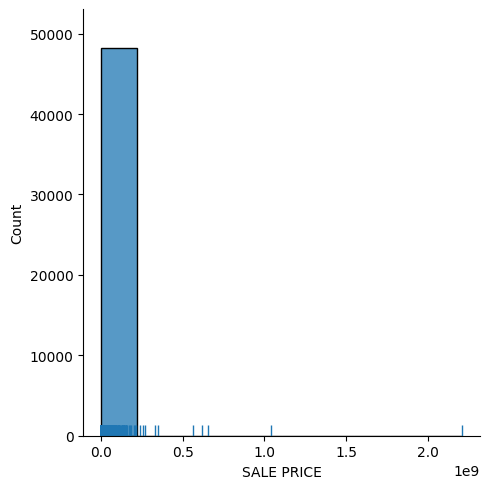

In [728]:
sns.displot(dfTest['SALE PRICE'], bins=10, rug=True)

### Membuat subset dan plot distribusi harga jual properti.





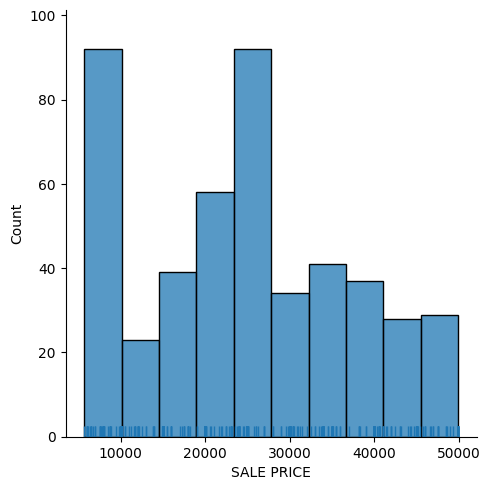

In [729]:
dfProb = dfTest[(dfTest['SALE PRICE'] > 5000) & (dfTest['SALE PRICE'] < 50000)]
sns.displot(dfProb['SALE PRICE'], bins=10, rug=True)

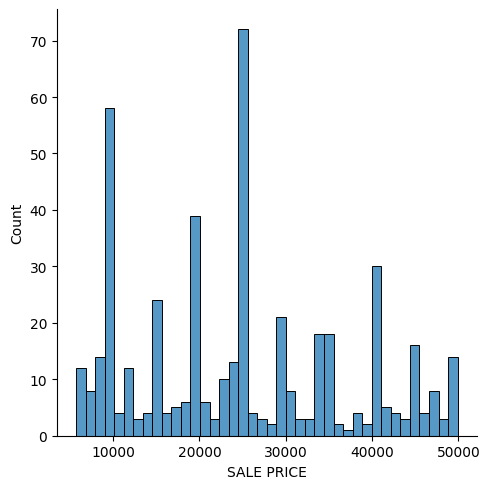

In [730]:
sns.displot(dfProb['SALE PRICE'], bins=40)

## **CONFIDENT INTERVALS**

### Membuat subset dataframe dengan kolom Borough dan Total Units.





In [731]:
df_confident_interval = dfTest[['BOROUGH','TOTAL UNITS']]
df_confident_interval

,BOROUGH,TOTAL UNITS
0,Manhattan,5
3,Manhattan,10
4,Manhattan,6
6,Manhattan,8
9,Manhattan,24
...,...,...
84543,Staten Island,2
84544,Staten Island,2
84545,Staten Island,2
84546,Staten Island,7


### Hitung jumlah Manhattan dengan unit <5.





In [732]:
count_borough = df_confident_interval[
    (df_confident_interval['TOTAL UNITS'] < 5) 
    & (df_confident_interval['BOROUGH'] == 'Manhattan')].count()

count_borough = count_borough['BOROUGH']
count_borough

469

### Jumlah data dengan 'TOTAL UNITS' > 5.

In [733]:
count_total_units = df_confident_interval[df_confident_interval['TOTAL UNITS'] > 5].count()
count_total_units = count_total_units['TOTAL UNITS']
count_total_units

2422

### Hitung proporsi Borough di Total Units.





In [734]:
proportion = count_borough / count_total_units
proportion 

0.1936416184971098

Output tersebut adalah hasil perhitungan proporsi unit properti yang memiliki total unit lebih dari 5 dan berada di Manhattan. Proporsi tersebut adalah sebesar 0.193 atau sekitar 19.36%. Hal ini dapat dijadikan sebagai gambaran untuk melihat seberapa besar kontribusi Manhattan dalam jumlah unit properti dengan total unit lebih dari 5 di New York City.





### Menghitung standar error proporsi.

In [735]:
n = count_total_units
a = proportion
standar_error = np.sqrt(proportion * (1 - a) / n)
standar_error

0.00802927504028574

Dalam analisis ini, kita menghitung proporsi jumlah properti yang memiliki total unit lebih dari 5 dan terletak di Manhattan. Proporsi ini kemudian digunakan untuk menghitung standar error, yaitu ukuran ketidakpastian dari sampel proporsi. Standar error yang dihasilkan sebesar 0.008 menunjukkan bahwa hasil proporsi yang ditemukan dalam sampel sangat mungkin berbeda dengan proporsi populasi secara keseluruhan.





### Menghitung batas bawah dan atas dari interval kepercayaan.





In [736]:
z_score = 1.96
lcb = a - z_score* standar_error #lower limit of the CI
ucb = a + z_score* standar_error #upper limit of the CI
lcb, ucb

(0.17790423941814976, 0.20937899757606987)

### Menghitung jumlah, rata-rata, dan standar deviasi Total Units dari data properti yang berada di Manhattan.

## **HYPOTHESIS TESTING**
 
Pertanyaan : apakah ada perbedaan total units yang terjual di wilayah manhattan dan di Bronx?

H0: μ1=μ2 Ada perbedaan yang significant

H1: μ1≠μ2 Tidak ada perbedaan yang significant

In [737]:
borough_manhattan = dfTest[dfTest["BOROUGH"] == 'Manhattan']
borough_bronx = dfTest[dfTest["BOROUGH"] == 'Bronx']

n1 = len(borough_manhattan)
mu1 = borough_manhattan["TOTAL UNITS"].mean()
sd1 = borough_manhattan["TOTAL UNITS"].std()

(n1, mu1, sd1)

(1006, 21.512922465208746, 67.79193609134414)

### Menghitung jumlah, rata-rata, dan standar deviasi Total Units dari data properti yang berada di Bronx.

In [738]:
n2 = len(borough_bronx)
mu2 = borough_bronx["TOTAL UNITS"].mean()
sd2 = borough_bronx["TOTAL UNITS"].std()

(n2, mu2, sd2)

(7049, 3.6037735849056602, 24.000651297746877)

### Menguji perbedaan rata-rata dua populasi menggunakan uji z.





In [739]:
sm.stats.ztest(borough_manhattan["TOTAL UNITS"].dropna(), borough_bronx["TOTAL UNITS"].dropna(),alternative='two-sided')

(16.18672885717689, 6.256750681492647e-59)

Output tersebut merupakan hasil uji statistik z-test yang dilakukan untuk membandingkan rata-rata jumlah unit antara daerah Manhattan dan Bronx. Hasil tersebut menunjukkan bahwa terdapat perbedaan yang signifikan antara rata-rata jumlah unit di daerah Manhattan dan Bronx, dengan nilai p-value yang sangat kecil (6.256750681492647e-59) dan z-score sebesar 16.18672885717689. Hal ini menunjukkan bahwa dapat menolak hipotesis nol (tidak ada perbedaan antara rata-rata jumlah unit di kedua daerah) dan mengambil hipotesis alternatif bahwa rata-rata jumlah unit di daerah Manhattan lebih tinggi daripada di daerah Bronx.